# Introdução

A atual arquitectuta dos CPUs permitem mais do que uma excecução sequencia de processos ao mesmo tempo, permitindo diminuir a execução total das tarefas. A maioria do código desenvolvido em python é sequencial e não faz uso das capacidades brutas do CPUs e dos diferentes núcleos que a maioria dos CPUs atuais têm.  

Mapping, Filtering e Reduce são ocnceitos importantes do Functional Programming. Estes conceitos são a base da compuptação distribuida e são utilizados pelos diferentes frameworks. Python também incorpora estes conceitos de forma nativa embora com algumas limitações pelo GIL (Global Interpreter Lock):
Para saber mais sobre como nativamente Python resolve o paradigma de Distribuição. 
Seguir o Link:


### Functional Programming

Functional programming é um paradigma da programação onde o código e escrito esta composto pela aplicação de funções o que evita a mutabilidade ou partilhar o estado da função. Este tipo de operaçoes é feito ao passar os dados pelas funções onde pode ter como input um parámetro, ou não, e adicionalmente e obitdo um resultado. 

Têm 3 tipos de características:

* **Pure Functions:** Não tem efeitos adversos pelo que não muda estado do programa. Dados mesmos inputs ( parámetros) o resultado vai ser exatamente igual 

* **Immutability:**   os dados não podem ser mudados uma vez é criada a a função(Inicializada)

* **Higher Order Functions:** São funções que aceitam outras funcões e podem devolver outro tipo de funções. permite um maior grau de flexibilidade e abstração ao desenvolvedor 

Uma dos grandes beneficios do Functional programming é modularidade do código e da aplicação que esta a ser desenvolvida. Força ao desenvolvedor a dividir o o problema em pequenas partes. é Mais fácil criar funções com um objetivo definido, embora pequeno, e depois juntá-lo que criar uma função maior que pode resultar mais complicada de utilizar e reusar.



Recursos Adicionais:

https://docs.python.org/3/howto/functional.html


Inmutability

In [8]:
# Definimos uma lista com Int 
#  Devolve cada um dos elementos iniciais da lista multiplicado por 2
def multiply_2_pure(numbers):
    new_numbers = []
    for n in numbers:
        new_numbers.append(n * 2)
    return new_numbers

In [9]:
# Lista com os número originais
original_numbers = [1, 3, 5, 10]

In [10]:
# Nova Lista que aplica a função 
changed_numbers = multiply_2_pure(original_numbers)

In [11]:
# Coportamento das Pure functions: Não  altera a lista original nem a Função
print(original_numbers) # [1, 3, 5, 10]

print(changed_numbers)  # [2, 6, 10, 20]

[1, 3, 5, 10]
[2, 6, 10, 20]


Higher Function

**Onde podemos ver que esta definição é uma Higher-function?**

In [14]:
# definimos uma função que aceita como parámetros uma mensagem e o número de vezes que tem de ser repetida a mensagem

def write_repeat(message, n):
    for i in range(n):
        print(message)

        
        
write_repeat('Hello', 5)

Hello
Hello
Hello
Hello
Hello


In [15]:
def hof_write_repeat(message, n, action):
    for i in range(n):
        action(message)

hof_write_repeat('Hello', 5, print)

import logging

hof_write_repeat('Hello', 5, logging.error)

ERROR:root:Hello
ERROR:root:Hello
ERROR:root:Hello
ERROR:root:Hello
ERROR:root:Hello


Hello
Hello
Hello
Hello
Hello


## MAP

`map()` e uma High-function própia de python cujo objetivo e aplicar uma função a uma sequência. A própria função, `map()` aceita como argumentos a função a ser aplicada a função e a sequencia à qual se quer aplicar a função. O resultado será um objeto iterável, inmutáble que o resultado de dita aplicação a cada um dos elementos da sequência. 

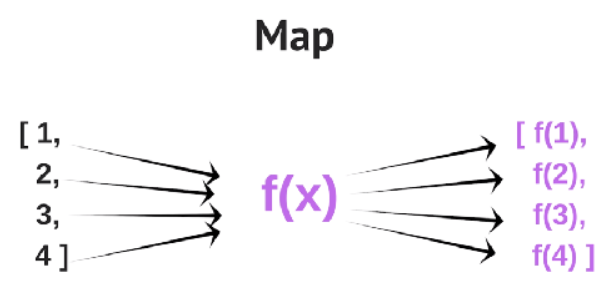

In [28]:
#Definimos a função
def half_div(x):
    return x / 2

In [29]:
# sequência, lista de números
l = [10, 20, 30, 100]

# criamos uma variável como o oobjeto
results = map(half_div, l)


In [30]:
list(results)

[5.0, 10.0, 15.0, 50.0]

## REDUCE

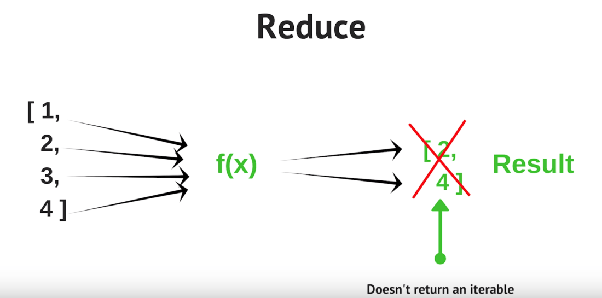

`reduce()`, ao contrario de `map()` não aplica a função a todos os elementos duma sequência, mas os agrega de forma cuulativa utilizando a afunção definida. o objetivo principal é tomar função, aplicá-la cumulativamente a todos os elementos numa iteração e criar assim um único valor final. Reduce e escrito em **C**, pelo que é mais rápido que um um loop escrito em python 

Esta função tem 3 carácteristicas no seu funcionamento:

**Aplicar:** aplica função aos dois primeros elementos da sequencia, agregá-los e produz um resultado parcial(intermédio)

**Usar:** utiliza este resultado parcial e aplica a função utilizando a terceiro elemento da sequência original para produzir mais um resultado intermédio

**Repetir:** repetir o processo até que já não existam mais elementos na sequência original e dé como resultado um único resultado

In [33]:
from functools import reduce 

In [34]:
def add(a, b):
    result = a + b
    print(f"{a} + {b} = {result}")
    return result

In [35]:
add(5, 5)

5 + 5 = 10


10

In [36]:
numeros = [0, 1, 2, 3, 4]

In [37]:
reduce(add,numeros)

0 + 1 = 1
1 + 2 = 3
3 + 3 = 6
6 + 4 = 10


10

In [38]:
 reduce(add, numeros, 100)

100 + 0 = 100
100 + 1 = 101
101 + 2 = 103
103 + 3 = 106
106 + 4 = 110


110

# Code Time

## MAP()
#### Challenge 0

Escreve um programa que triplique os números na seguinte lista 

In [9]:
nums = [1, 2, 3, 4, 5, 6, 7]

In [ ]:
# a sua resposta aqui

In [11]:
def by3(x):
    return x*3
list(map(by3,nums))

[3, 6, 9, 12, 15, 18, 21]

### Challenge 1

Escreve um programa que some as 3 listas e retorne uma lista com 3 elementos

In [3]:
nums1 = [1, 2, 3] 
nums2 = [4, 5, 6] 
nums3 = [7, 8, 9] 

In [2]:
# escreva a sua resposta aqui

In [6]:
def sum_list(x,y,z):
    return  x+y+z
     

In [7]:
list(map(sum_list,nums1,nums2,nums3 ))

[12, 15, 18]

### Challenge 2 

dado duas listas, utilize a função `pow()`. a primera lista são as bases e a segudna lista são os exponentes

In [14]:
base = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
exp = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [ ]:
# Escreva a sua resposta aqui

In [15]:
list(map(pow, base, exp))

[10,
 400,
 27000,
 2560000,
 312500000,
 46656000000,
 8235430000000,
 1677721600000000,
 387420489000000000,
 100000000000000000000]

### Challenge 3

escreva uma programa que transforme os strings numa lista numa lista de listas
lists = ['aa','bb] ---> [['a','a'],['b','b']]

In [2]:
colors = ["vermelho", "verde", "negro", "laranja"]

In [17]:
# escreva a sua resposta aqui 

In [10]:
def str2list(str):
    result = map(list, str)
    return list(result)

In [4]:
str2list(colors)

[['v', 'e', 'r', 'm', 'e', 'l', 'h', 'o'],
 ['v', 'e', 'r', 'd', 'e'],
 ['n', 'e', 'g', 'r', 'o'],
 ['l', 'a', 'r', 'a', 'n', 'j', 'a']]

# The final Challenge

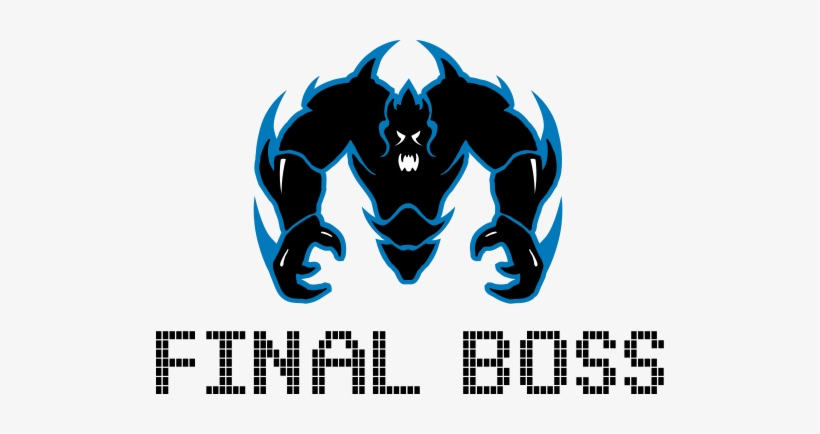

Escreva um programa onde faça uso da função `map()` e da função reduce `reduce()` com as seguintes características:

* Crie uma lista de strings com cada um dos seus nomes: ["German","Augsto","Mendez"]
* Cria uma função que cria uma lista de lista com os vossos nomes [["G","E","R","M","A","N"],["M","E","N","D","E","Z"]]
* Crie uma função que mapeie cada letra à sua posição no abedecário Ex: A:1, B;2, B;3, B;4
* Crie uma funçãao que some o valor de cada nome 
* Crie uma função que some o resultado anterior

In [12]:
from functools import reduce 
# a sua respota aqui

In [3]:
name = ["german","diaz","augsto","mendez"]

In [12]:
name_sep = str2list(name)

In [5]:
def mapletter2num():
    d = {} #empty dictionary
    alpha = 'abcdefghijklmnopqrstuvwxyz'
    for i in range(26):
        d[alpha[i]] = i 
    return d

In [6]:
def mappingL2N(liststr):
    letterdict = mapletter2num()
    nums = []
    for x in liststr:
        nums.append(letterdict[x])
    return nums

In [15]:
namenum = list(map(mappingL2N,name_sep))

In [7]:
def add(a, b):
    result = a + b
    return result

In [8]:
def reduce_num(numlist):
    return reduce(add,numlist)

In [18]:
reduce_list = list(map(reduce_num,namenum ))

In [19]:
reduce(add,reduce_list)

226

In [9]:
def my_name_is(namelist):
    name_sep = str2list(namelist)
    namenum = list(map(mappingL2N,name_sep))
    reduce_list = list(map(reduce_num,namenum ))
    res_num = reduce(add,reduce_list)
    return res_num
    

### EXTRA POINTS 

Transforme para `string` o resultado é itere o cria as funções necessárias para transformar os número em letras

In [26]:
# escreva a sua resposta 
import string

In [24]:
numstr = list(str(my_name_is(name)))

In [29]:
nums2letter = dict(zip(range(1, 27), string.ascii_lowercase))

In [31]:
def num2abc(val):
    return nums2letter[int(val)]
    

In [34]:
list(map(num2abc,numstr ))

['b', 'b', 'f']